In [1]:
import pandas as pd

# 文件路径
file_path_1113 = r"C:\Users\Admin\Documents\GitHub\kaggle_\csiro-biomass\0分析1113、1114问题原因\df1113.csv"
file_path_1114 = r"C:\Users\Admin\Documents\GitHub\kaggle_\csiro-biomass\0分析1113、1114问题原因\df1114.csv"

# 加载 CSV 文件
df_1113 = pd.read_csv(file_path_1113)
df_1114 = pd.read_csv(file_path_1114)



In [4]:
# 假设 df 中有一个共同的 id 列（例如 'id'），我们基于 id 来进行验证
# 合并两个 DataFrame，根据 'id' 列对齐，并且只保留 'id' 和 'fold' 列
merged_df = pd.merge(df_1113[['ID', 'fold']], df_1114[['ID', 'fold']], on='ID', suffixes=('_1113', '_1114'))

# 检查 'fold_1113' 和 'fold_1114' 列是否一致
merged_df['fold_match'] = merged_df['fold_1113'] == merged_df['fold_1114']

# 输出不匹配的行
mismatched_rows = merged_df[merged_df['fold_match'] == False]

# 查看合并后的数据和不匹配的行
print("不匹配的行：")
print(mismatched_rows)

# 返回数据检查
merged_df.head()

不匹配的行：
Empty DataFrame
Columns: [ID, fold_1113, fold_1114, fold_match]
Index: []


,ID,fold_1113,fold_1114,fold_match
0,ID1011485656,2,2,True
1,ID1012260530,3,3,True
2,ID1025234388,2,2,True
3,ID1028611175,1,1,True
4,ID1035947949,4,4,True


In [2]:
df_1114.columns.tolist()

['ID',
 'image_path',
 'Sampling_Date',
 'State',
 'Species',
 'Pre_GSHH_NDVI',
 'Height_Ave_cm',
 'Dry_Clover_g',
 'Dry_Dead_g',
 'Dry_Green_g',
 'Dry_Total_g',
 'GDM_g',
 'GroupID',
 'fold']

In [3]:
import pandas as pd

cols = [
    'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm',
    'Dry_Clover_g', 'Dry_Dead_g', 'Dry_Green_g',
    'Dry_Total_g', 'GDM_g'
]

folds = sorted(df_1114['fold'].unique())

for f in folds:
    print(f"\n================ Fold {f} ================")
    
    df_in = df_1114[df_1114['fold'] == f]      # 本 fold
    df_out = df_1114[df_1114['fold'] != f]     # 其他 fold
    
    print("\n▶ 本 fold（IN）描述统计：")
    print(df_in[cols].describe(include='all'))
    
    print("\n▶ 非本 fold（OUT）描述统计：")
    print(df_out[cols].describe(include='all'))



================ Fold 0 ================

▶ 本 fold（IN）描述统计：
       State          Species  Pre_GSHH_NDVI  Height_Ave_cm  Dry_Clover_g  \
count     74               74      74.000000      74.000000     74.000000   
unique     4                7            NaN            NaN           NaN   
top      Vic  Ryegrass_Clover            NaN            NaN           NaN   
freq      37               29            NaN            NaN           NaN   
mean     NaN              NaN       0.653514       5.360362      8.725834   
std      NaN              NaN       0.141329       4.559768     14.573984   
min      NaN              NaN       0.340000       1.000000      0.000000   
25%      NaN              NaN       0.542500       3.000000      0.000000   
50%      NaN              NaN       0.665000       4.000000      1.117350   
75%      NaN              NaN       0.787500       5.625025     11.315300   
max      NaN              NaN       0.860000      24.333300     58.880000   

        Dry_De

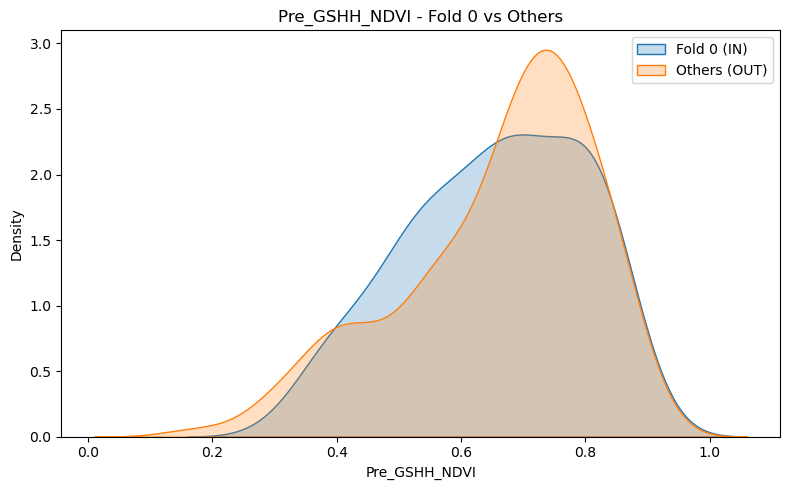

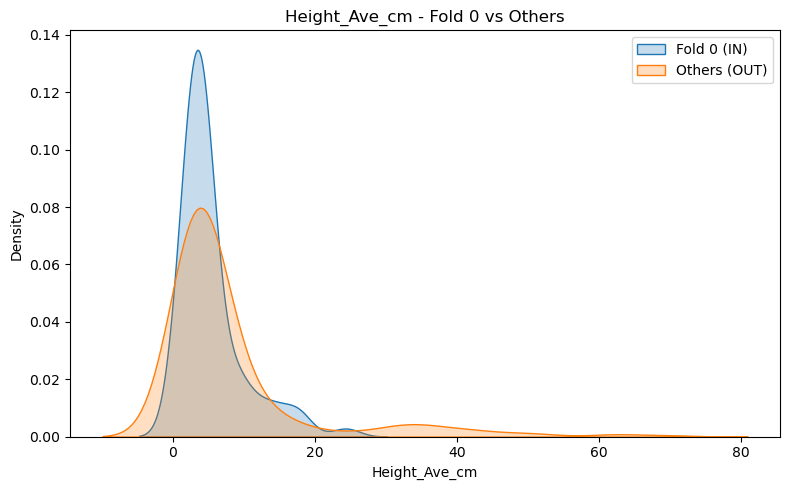

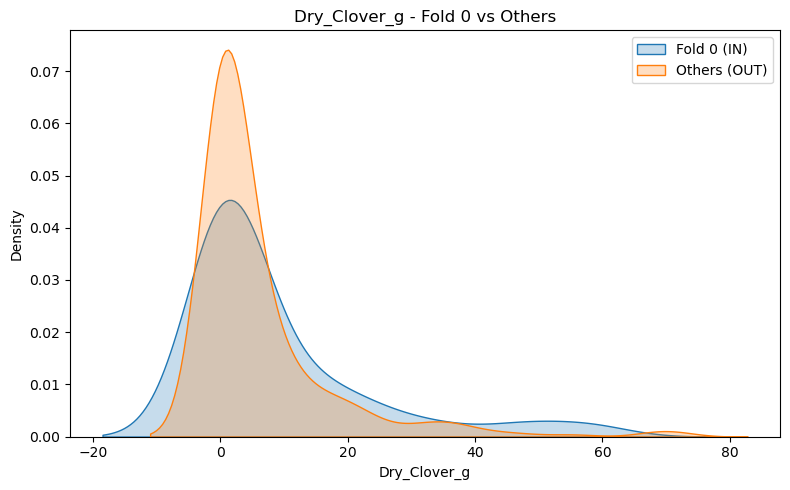

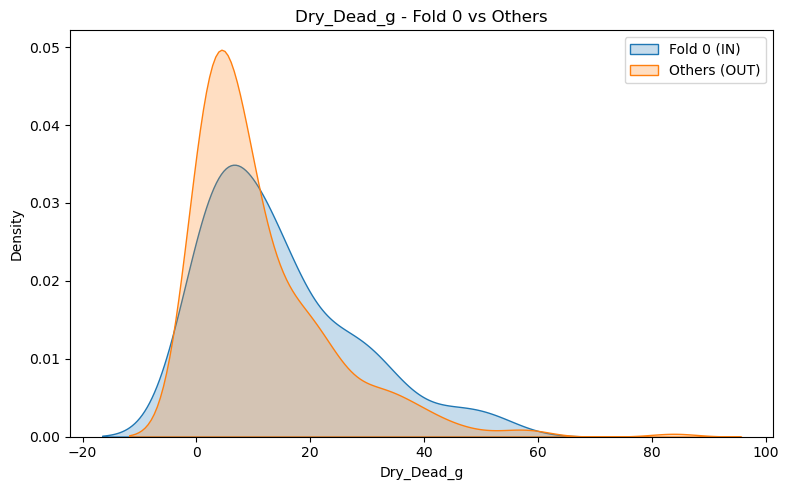

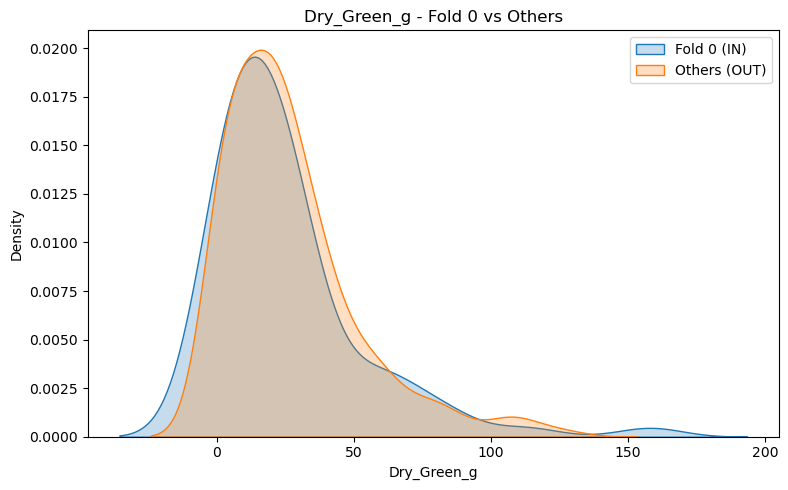

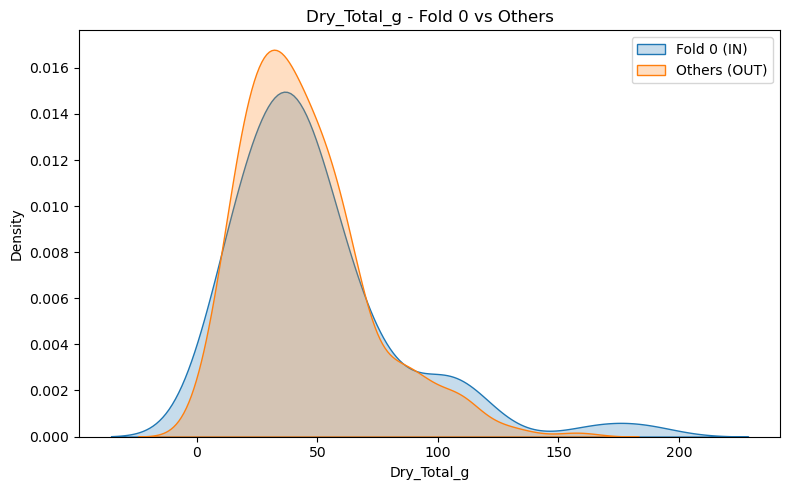

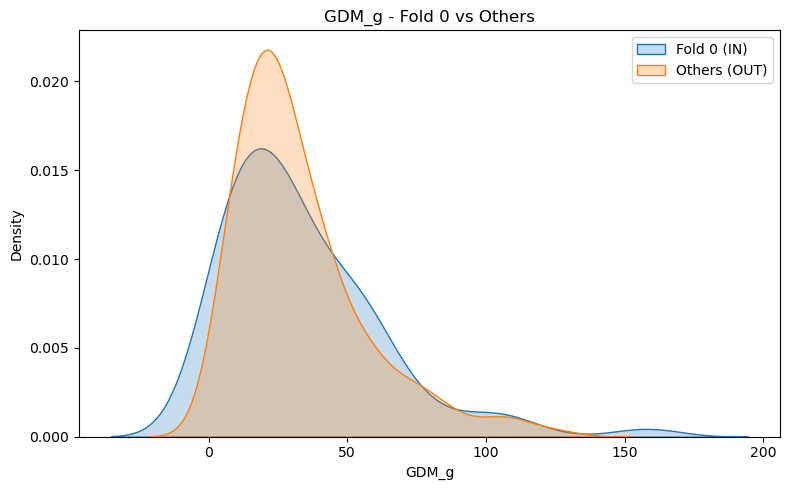

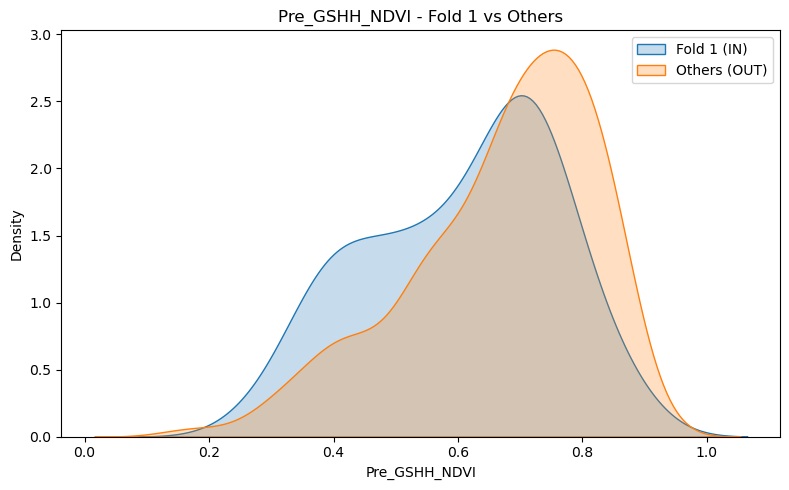

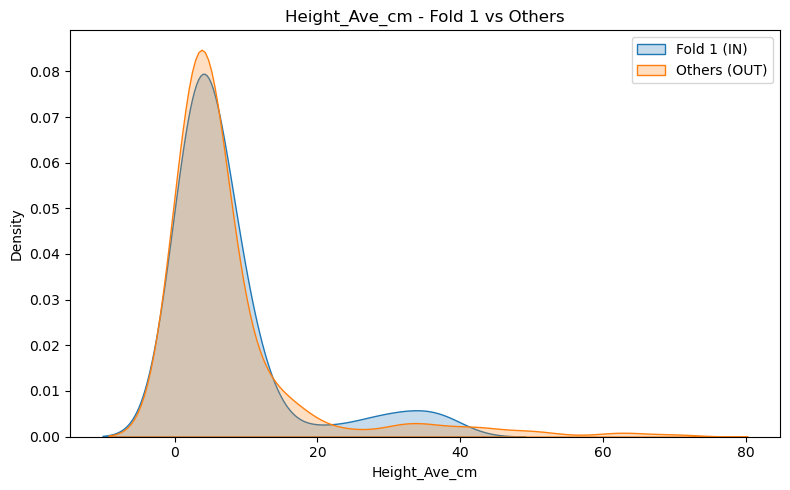

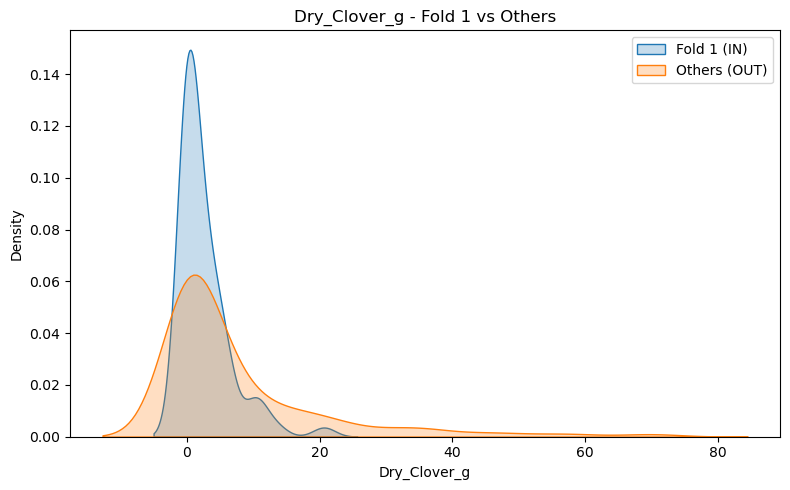

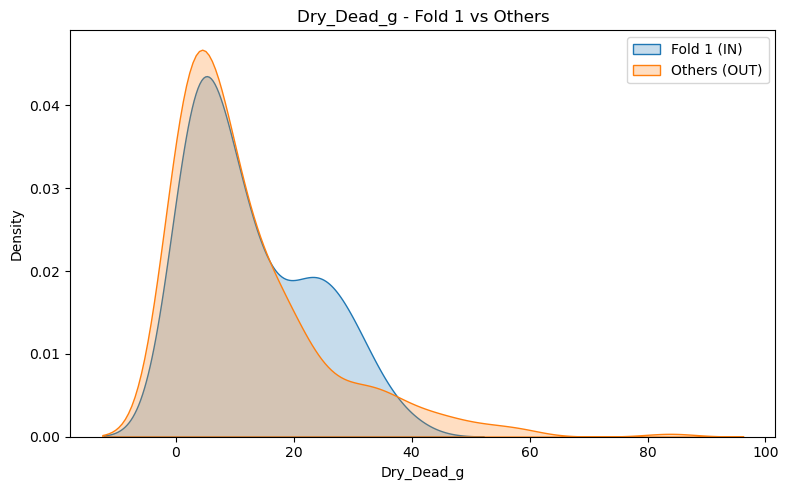

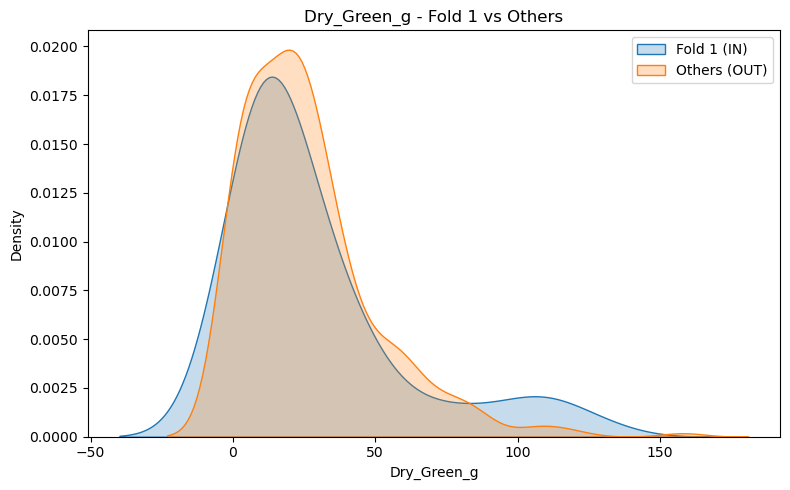

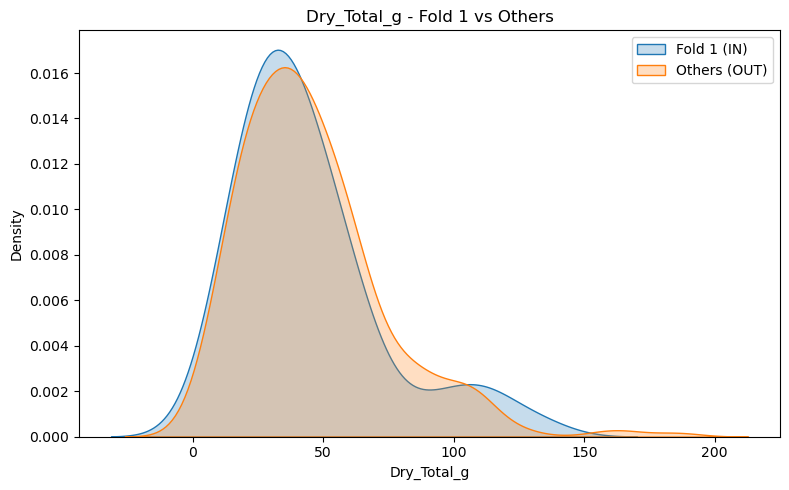

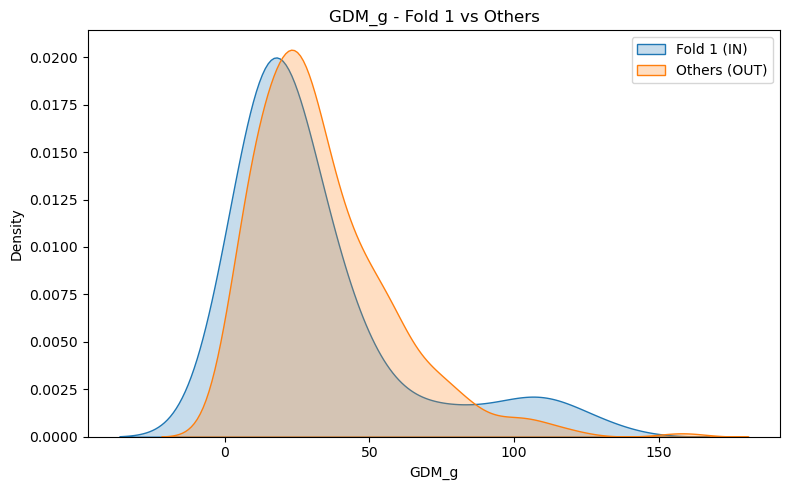

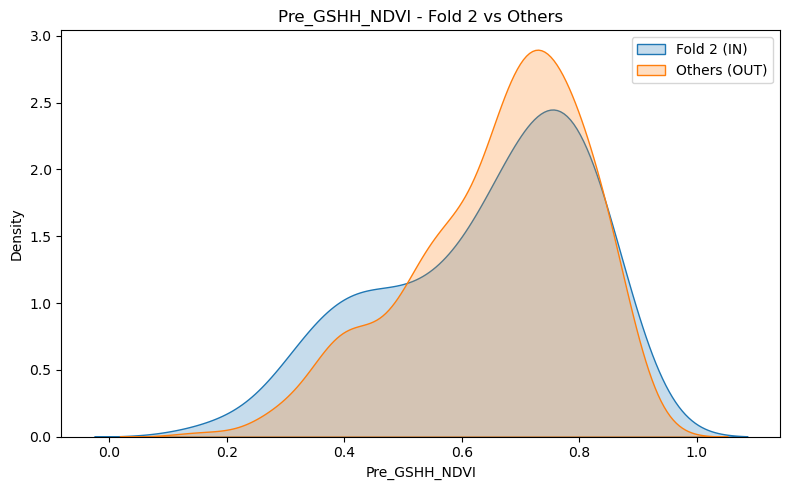

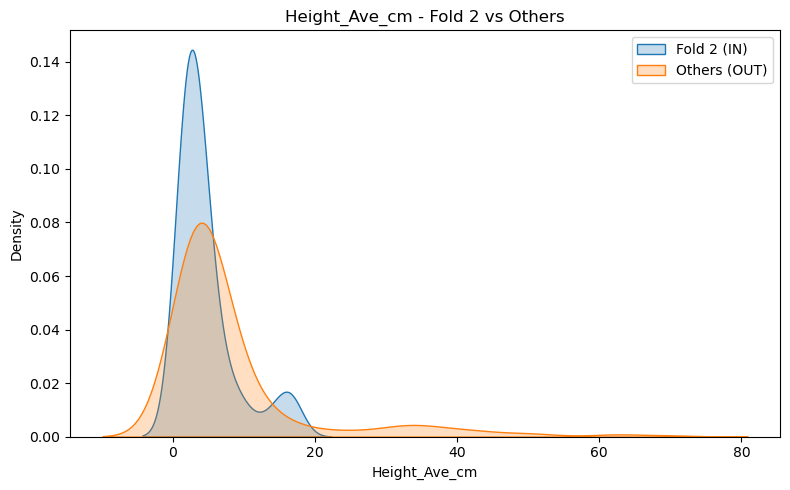

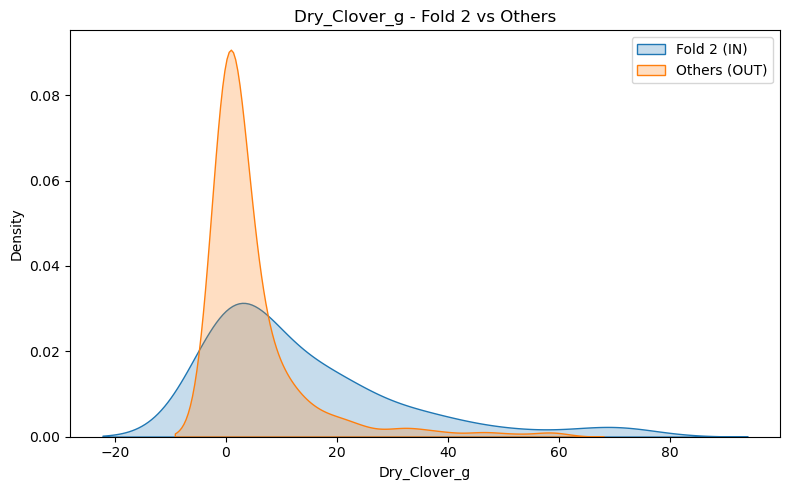

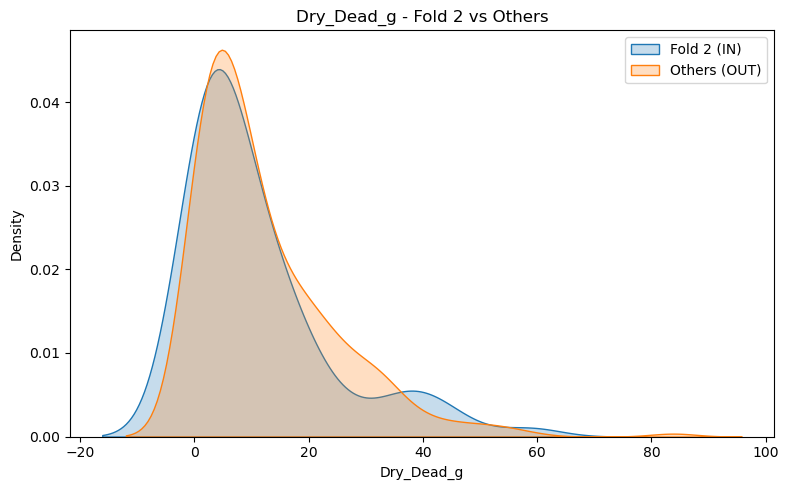

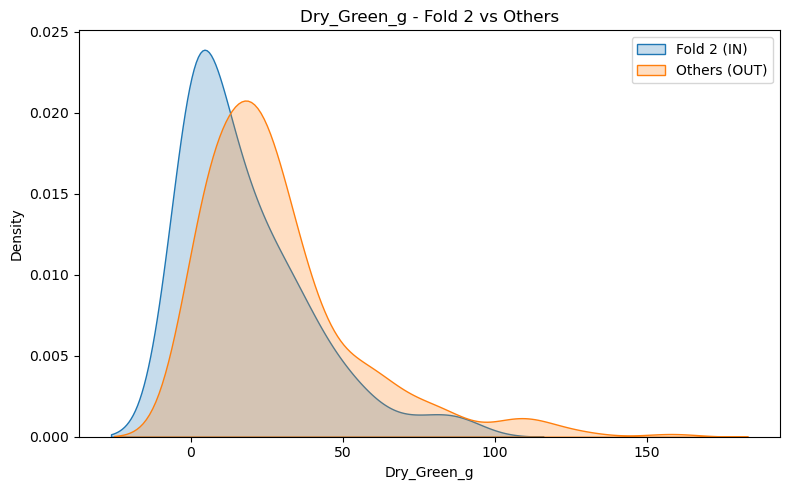

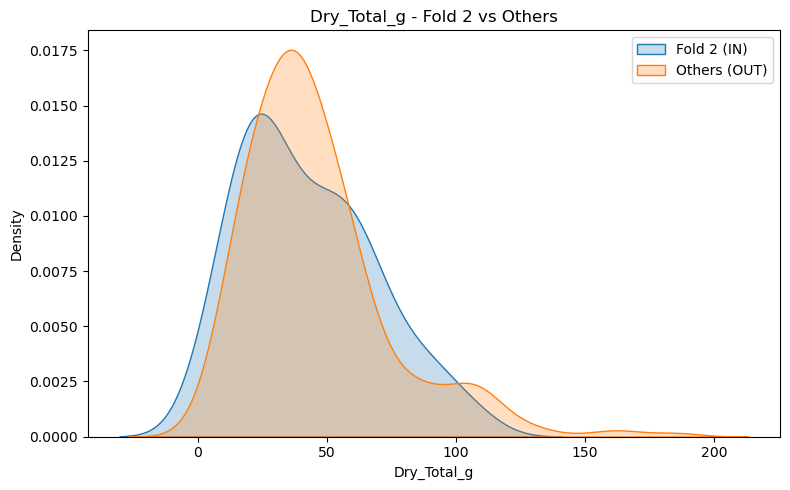

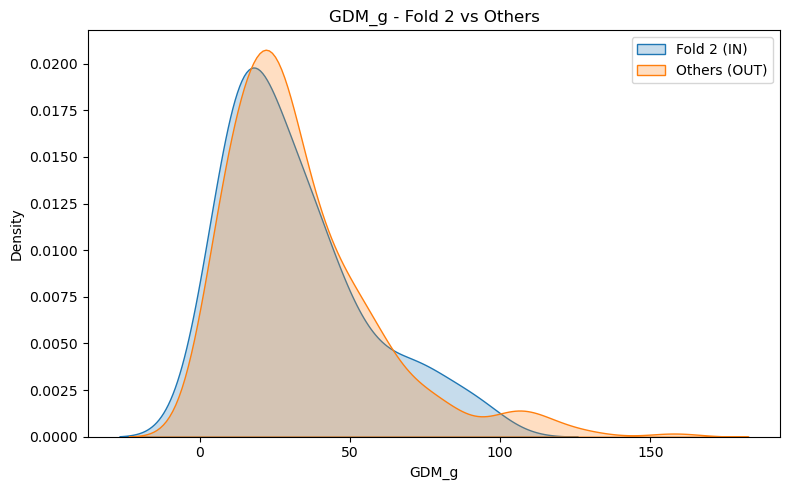

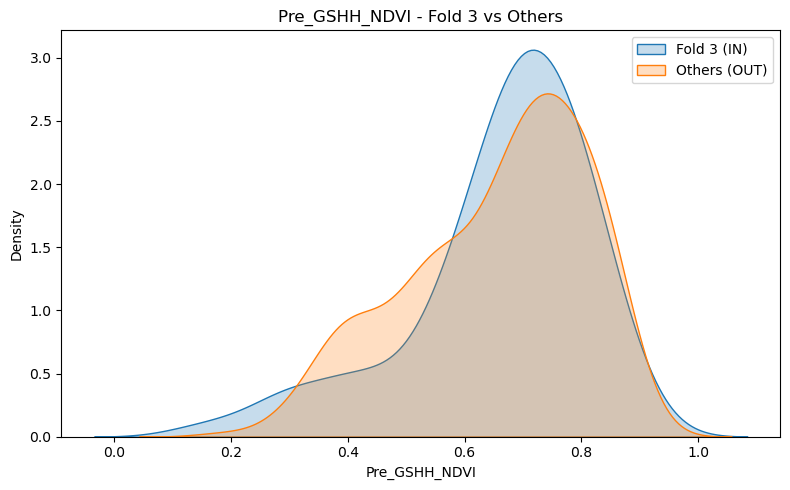

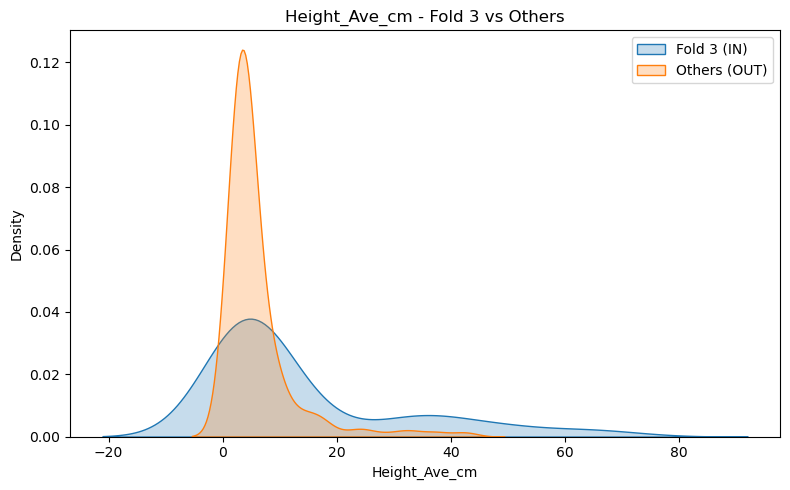

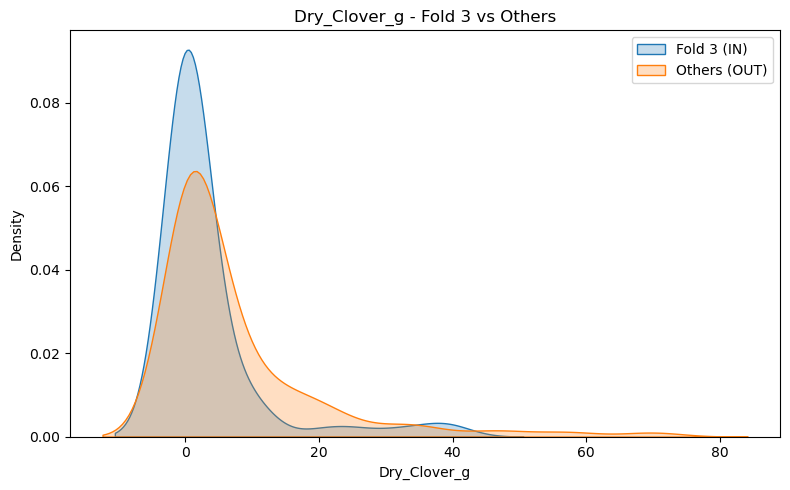

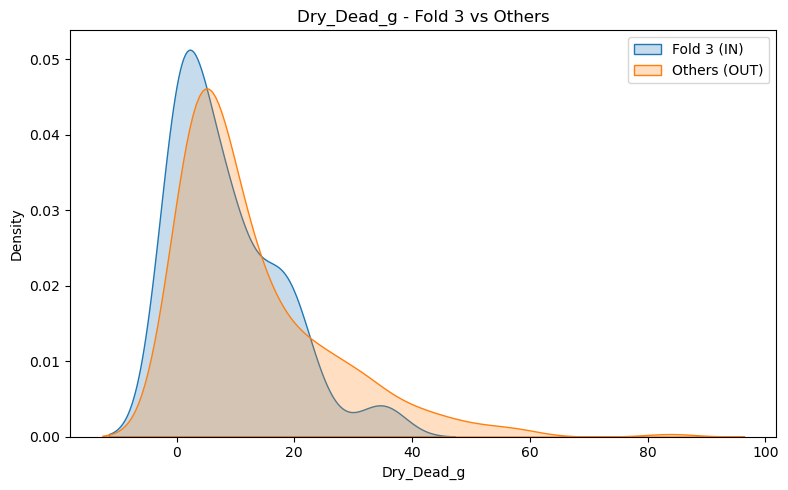

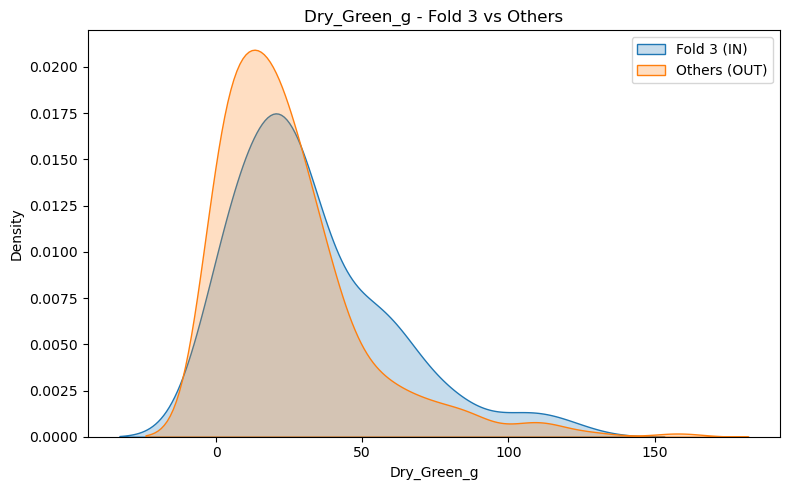

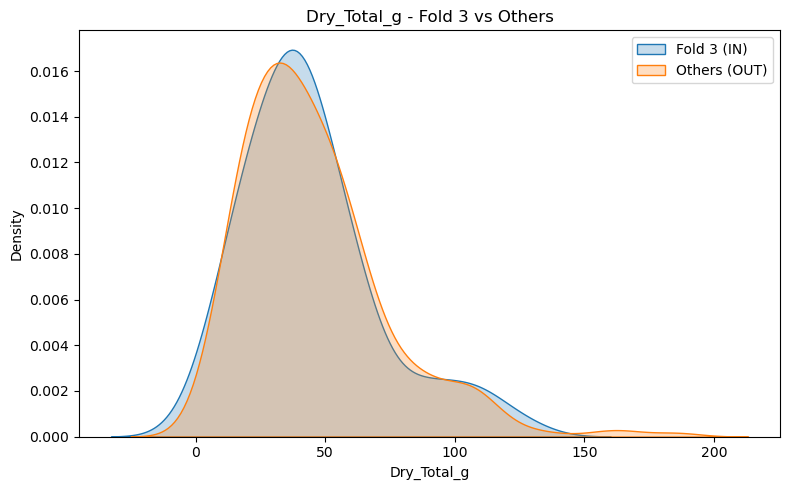

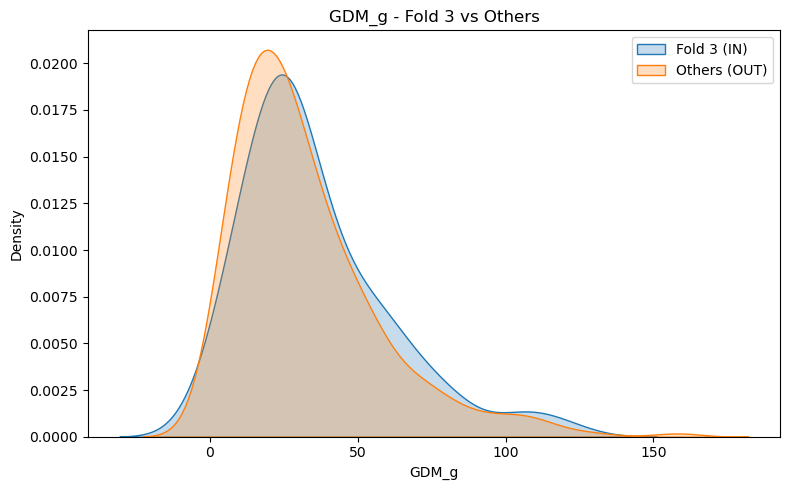

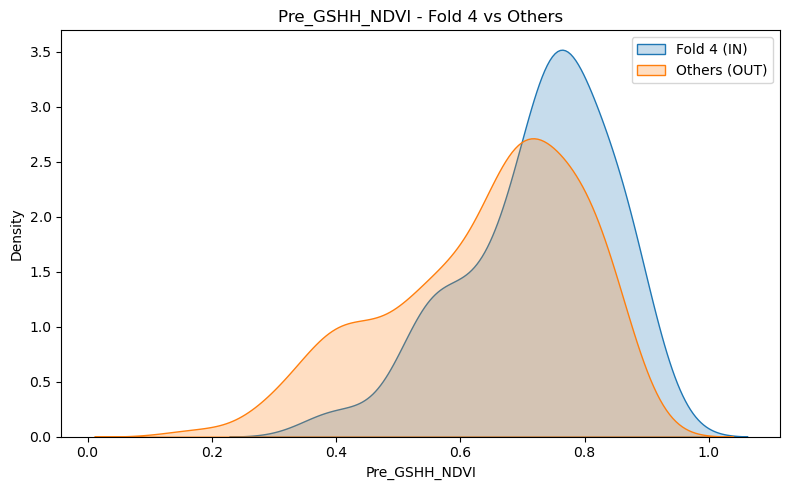

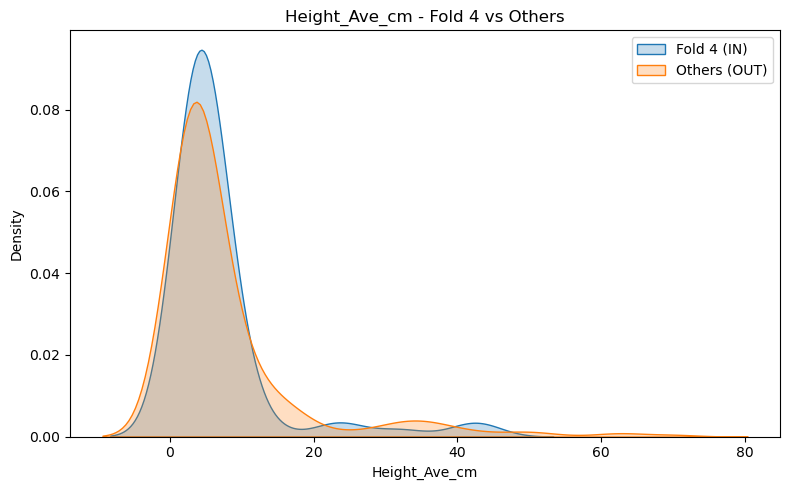

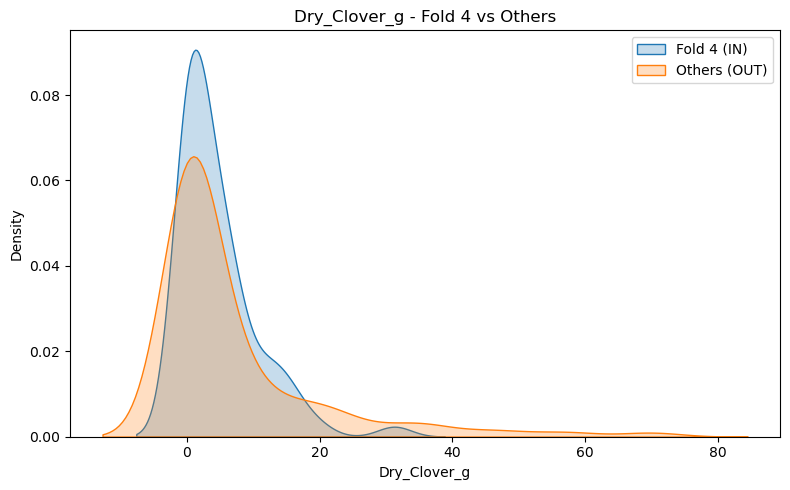

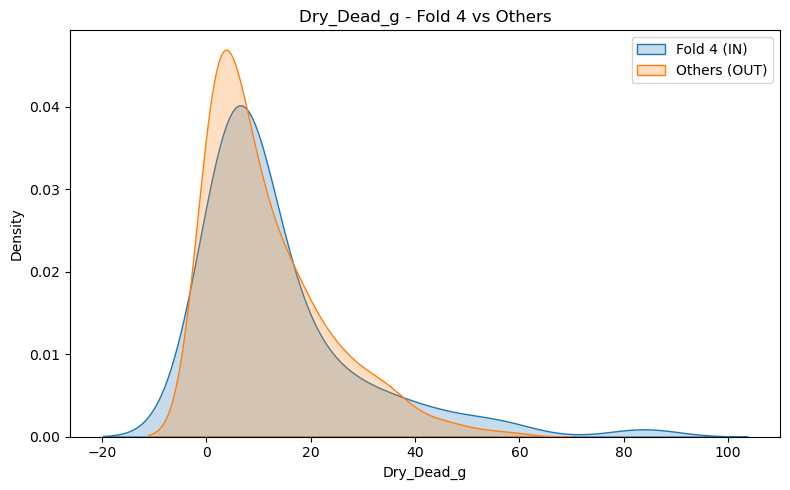

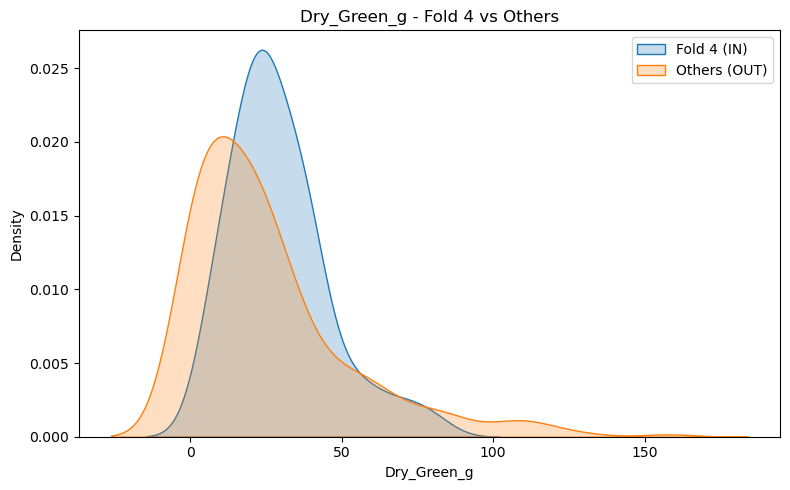

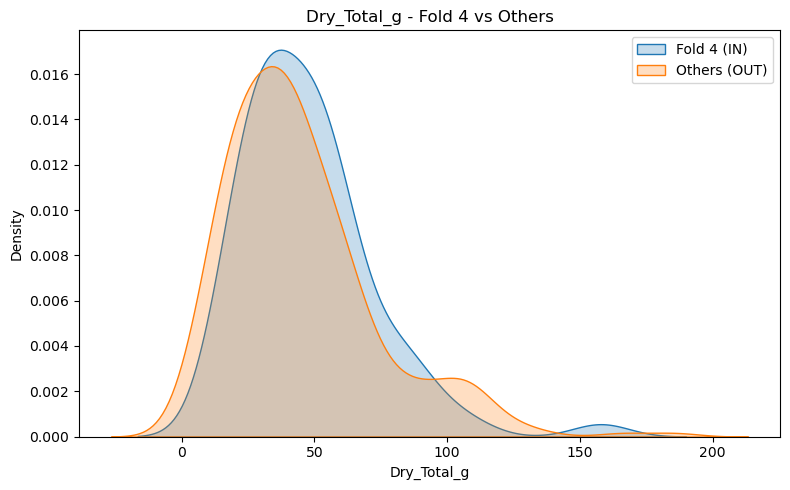

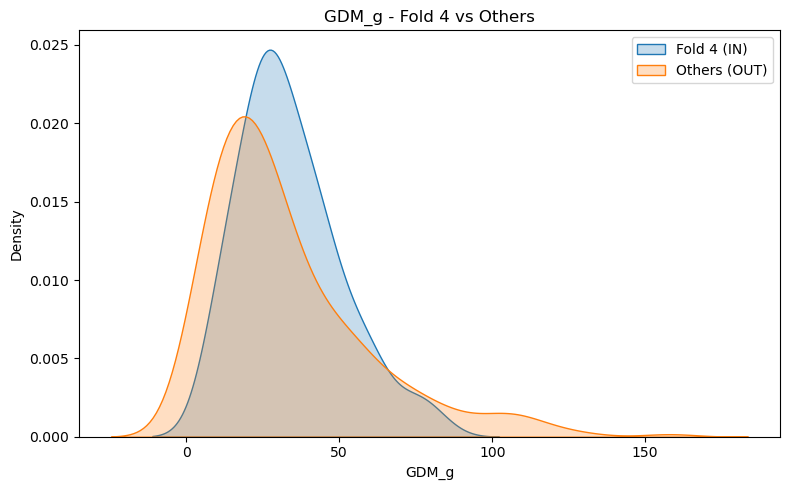

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for f in folds:
    df_in = df_1114[df_1114['fold'] == f]
    df_out = df_1114[df_1114['fold'] != f]
    
    for col in cols[2:]:   # 数值列，从 Pre_GSHH_NDVI 开始
        plt.figure(figsize=(8,5))
        
        sns.kdeplot(df_in[col], fill=True, label=f"Fold {f} (IN)")
        sns.kdeplot(df_out[col], fill=True, label=f"Others (OUT)")
        
        plt.title(f"{col} - Fold {f} vs Others")
        plt.legend()
        plt.tight_layout()
        plt.show()
